In [13]:
# load all packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['savefig.dpi'] = 1.5 * matplotlib.rcParams['savefig.dpi']
import seaborn as sns
from datetime import datetime
pd.set_option('notebook_repr_html', True)
pd.set_option('display.max_rows', 20)
from collections import OrderedDict
from bokeh.plotting import figure, show, output_notebook, ColumnDataSource
from bokeh.models import HoverTool

In [2]:
# load all data
#trips1 = pd.read_csv('~/TDI/divvy/useful_data/Divvy_Trips_2014-Q1Q2.csv')#.astype(str)
trips2 = pd.read_csv('~/TDI/divvy/useful_data/Divvy_Trips_2014-Q3-07.csv')#.astype(str)
trips3 = pd.read_csv('~/TDI/divvy/useful_data/Divvy_Trips_2014-Q3-0809.csv')#.astype(str)
#trips4 = pd.read_csv('~/TDI/divvy/useful_data/Divvy_Trips_2014-Q4.csv')#.astype(str)
#trips5 = pd.read_csv('~/TDI/divvy/useful_data/Divvy_Trips_2013.csv').astype(str)
trips = pd.concat([trips2, trips3])
stations = pd.read_csv('~/TDI/divvy/useful_data/Divvy_Stations_2014-Q3Q4.csv').set_index('id')

print len(trips), len(stations)

1110970 300


In [3]:
def convert_date(old_datetime):
    return datetime.strptime(old_datetime, '%m/%d/%Y %H:%M')

trips.starttime = trips.starttime.map(convert_date)
trips.stoptime = trips.stoptime.map(convert_date)

In [4]:
def is_weekday(a_datetime):
    return True if a_datetime.weekday() in range(4) else False

def is_am(a_datetime):
    return True if 6 <= a_datetime.hour < 10 else False

def is_pm(a_datetime):
    return True if 15 <= a_datetime.hour < 19 else False

def in_s_ids(s_id, s_ids):
    return True if s_id in s_ids else False

In [5]:
# station ids near Union Station
us_ids = [75, 77, 91, 174, 191, 192]

# select weekdays, am rush hours, from_stations near Union Station, and subscribers
trips_am = trips[trips.starttime.map(is_weekday)\
                 & trips.starttime.map(is_am)\
                 & trips.from_station_id.apply(in_s_ids, s_ids=us_ids)\
                 & (trips.usertype == 'Subscriber')]

# select weekdays, pm rush hours, to_stations near Union Station, and subscribers
trips_pm = trips[trips.starttime.map(is_weekday)\
                 & trips.starttime.map(is_pm)\
                 & trips.to_station_id.apply(in_s_ids, s_ids=us_ids)\
                 & (trips.usertype == 'Subscriber')]

print len(trips_am), len(trips_pm)

21554 23455


/home/chenyu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(array([ 0.00057877,  0.        ,  0.00057877,  0.00057877,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.00115754,
         0.00405139,  0.00115754,  0.00694525,  0.0138905 ,  0.00173631]),
 array([  14. ,   46.6,   79.2,  111.8,  144.4,  177. ,  209.6,  242.2,
         274.8,  307.4,  340. ,  372.6,  405.2,  437.8,  470.4,  503. ]),
 <a list of 15 Patch objects>)

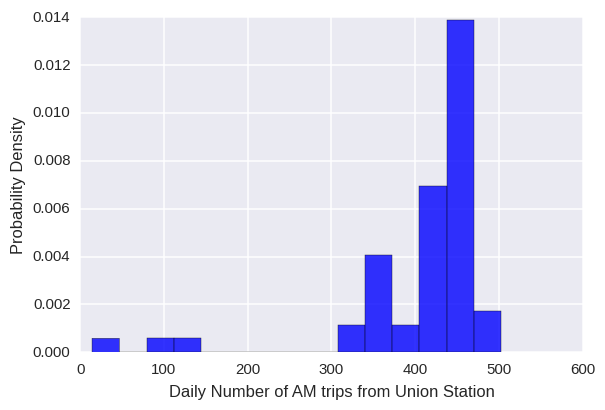

In [17]:
def get_date(a_datetime):
    return a_datetime.date()

trips_am['date'] = trips_am.starttime.apply(get_date)
trips_am_by_date = trips_am.groupby('date').size()

plt.xlabel('Daily Number of AM trips from Union Station')
plt.ylabel('Probability Density')
plt.hist(trips_am_by_date, bins=15, normed=True, alpha=0.8, color='b')


(array([ 0.00387797,  0.00349018,  0.00193899,  0.00193899,  0.0003878 ,
         0.00077559,  0.00155119,  0.        ,  0.0003878 ,  0.        ,
         0.0003878 ,  0.        ,  0.0003878 ,  0.        ,  0.0003878 ]),
 array([  237.        ,   301.46666667,   365.93333333,   430.4       ,
          494.86666667,   559.33333333,   623.8       ,   688.26666667,
          752.73333333,   817.2       ,   881.66666667,   946.13333333,
         1010.6       ,  1075.06666667,  1139.53333333,  1204.        ]),
 <a list of 15 Patch objects>)

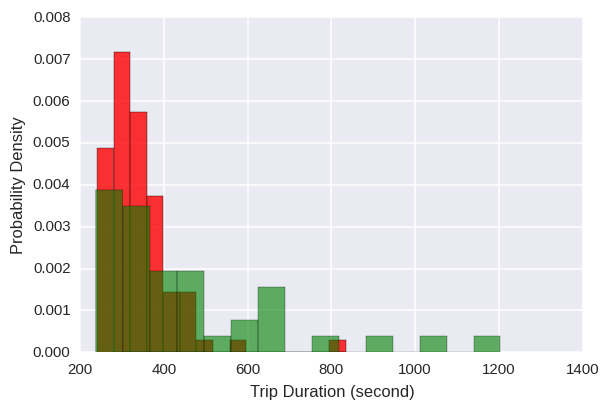

In [18]:
a_trip_wd = trips_am[(trips_am.from_station_id==77) & (trips_am.to_station_id==49)]
a_trip_we = trips_we[(trips_we.from_station_id==77) & (trips_we.to_station_id==49)]
plt.xlabel('Trip Duration (second)')
plt.ylabel('Probability Density')
plt.hist(a_trip_wd.tripduration.values, bins=15, normed=True, alpha=0.8, color='r')
plt.hist(a_trip_we.tripduration.values, bins=15, normed=True, alpha=0.6, color='g')

#print a_trip_wd.tripduration.describe()
#print a_trip_we.tripduration.describe()

In [10]:
def is_weekend(a_datetime):
    return True if a_datetime.weekday() in [5,6] else False

trips_we = trips[trips.starttime.map(is_weekend) & (trips.from_station_id==77)]
trips_we.groupby(['from_station_id', 'to_station_id']).size().order(ascending=False).head(10)

from_station_id  to_station_id
77               76               53
                 90               46
                 77               45
                 198              45
                 49               40
                 35               32
                 85               31
                 57               29
                 140              26
                 197              26
dtype: int64

In [11]:
trips_am[trips_am.from_station_id==77].groupby(['from_station_id', 'to_station_id']).size().order(ascending=False).head(10)

from_station_id  to_station_id
77               283              208
                 134              141
                 49                88
                 342               84
                 37                84
                 36                77
                 164               68
                 68                66
                 33                63
                 90                60
dtype: int64

In [48]:
print stations.ix[77]['name']
print stations.ix[49]['name']

Clinton St & Madison St
Dearborn St & Monroe St


In [ ]:
print stations[stations.name == 'Clinton St & Washington Blvd']['name'] #91
print stations[stations.name == 'Michigan Ave & Washington St']['name'] #43

In [25]:
# group trips by to_station for am and pick the 20 most popular arrival stations
trips_am_by_to_id = trips_am.groupby('to_station_id').size().order(ascending=False)[:20]
trips_am_by_from_id = trips_am[trips_am.to_station_id.apply(in_s_ids, s_ids=trips_am_by_to_id.index)]\
                      .groupby('from_station_id').size().order(ascending=False)

# group trips by from_station for pm and pick the 20 most popular departure stations
trips_pm_by_from_id = trips_pm.groupby('from_station_id').size().order(ascending=False)[:20]
trips_pm_by_to_id = trips_pm[trips_pm.from_station_id.apply(in_s_ids, s_ids=trips_pm_by_from_id.index)]\
                    .groupby('to_station_id').size().order(ascending=False)

In [ ]:
# station info for stations near Union Station
us_lons = stations.ix[us_ids].longitude
us_lats = stations.ix[us_ids].latitude
us_names = stations.ix[us_ids].name
us_am_counts = trips_am_by_from_id.ix[us_ids]
us_pm_counts = trips_pm_by_to_id.ix[us_ids]

In [ ]:
# station info for popular am arrival stations
am_stations = stations.ix[trips_am_by_to_id.index]
am_lons = am_stations.longitude
am_lats = am_stations.latitude
am_names = am_stations.name
am_counts = trips_am_by_to_id

In [ ]:
# station info for popular pm departure stations
pm_stations = stations.ix[trips_pm_by_from_id.index]
pm_lons = pm_stations.longitude
pm_lats = pm_stations.latitude
pm_names = pm_stations.name
pm_counts = trips_pm_by_from_id

In [ ]:
output_notebook()
TOOLS = "pan, wheel_zoom, box_zoom, reset, hover, save"

source_us = ColumnDataSource(
    data = dict(
        x = us_lons,
        y = us_lats,
        radius = np.sqrt(us_am_counts)/25000,
        color = ['#FF0000']*len(us_am_counts),
        name = us_names,
        count = us_am_counts
        #capacity = new_cap,
        #flow = new_net_flow,
    )
)

source_am = ColumnDataSource(
    data = dict(
        x = am_lons,
        y = am_lats,
        radius = np.sqrt(am_counts)/25000,
        color = ['#0000FF']*len(am_lons),
        name = am_names,
        count = am_counts
        #capacity = new_cap,
        #flow = new_net_flow,
    )
)

p = figure(title="Weekday AM Rush Hour", tools=TOOLS)
p.scatter('x', 'y', radius='radius', fill_color='color', fill_alpha=0.5, line_color=None, source=source_us)
p.scatter('x', 'y', radius='radius', fill_color='color', fill_alpha=0.5, line_color=None, source=source_am)
p.xaxis.axis_label = 'Longitude'
p.yaxis.axis_label = 'Latitude'

hover = p.select(dict(type=HoverTool))
hover.point_policy = "follow_mouse"
hover.tooltips = OrderedDict([
    ("Station Name", "@name"),
    #("Capacity", "@capacity bikes"),
    ("Ingoing Trips:", "@count"),
])

#show(p)

In [ ]:
output_notebook()
TOOLS = "pan, wheel_zoom, box_zoom, reset, hover, save"

source_us = ColumnDataSource(
    data = dict(
        x = us_lons,
        y = us_lats,
        radius = np.sqrt(us_pm_counts)/25000,
        color = ['#0000FF']*len(us_pm_counts),
        name = us_names,
        count = us_am_counts
        #capacity = new_cap,
        #flow = new_net_flow,
    )
)

source_pm = ColumnDataSource(
    data = dict(
        x = pm_lons,
        y = pm_lats,
        radius = np.sqrt(pm_counts)/25000,
        color = ['#FF0000']*len(pm_lons),
        name = pm_names,
        count = pm_counts
        #capacity = new_cap,
        #flow = new_net_flow,
    )
)

p = figure(title="Weekday PM Rush Hour", tools=TOOLS)
p.scatter('x', 'y', radius='radius', fill_color='color', fill_alpha=0.5, line_color=None, source=source_us)
p.scatter('x', 'y', radius='radius', fill_color='color', fill_alpha=0.5, line_color=None, source=source_pm)
p.xaxis.axis_label = 'Longitude'
p.yaxis.axis_label = 'Latitude'

hover = p.select(dict(type=HoverTool))
hover.point_policy = "follow_mouse"
hover.tooltips = OrderedDict([
    ("Station Name", "@name"),
    #("Capacity", "@capacity bikes"),
    ("Ingoing Trips:", "@count"),
])

#show(p)

In [ ]:
from __future__ import print_function

from bokeh.browserlib import view
from bokeh.document import Document
from bokeh.embed import file_html
from bokeh.models.glyphs import Circle
from bokeh.models import (
    GMapPlot, Range1d, ColumnDataSource, LinearAxis,
    PanTool, WheelZoomTool, BoxSelectTool,
    BoxSelectionOverlay, GMapOptions,
    NumeralTickFormatter, PrintfTickFormatter)
from bokeh.resources import INLINE

x_range = Range1d()
y_range = Range1d()

# 41.8827° N, 87.6227° W for Millenium Park
# 41.8786° N, 87.6402° W for Union Station
# 41.8858° N, 87.6309° W for Clark/Lake

# JSON style string taken from: https://snazzymaps.com/style/1/pale-dawn
map_options = GMapOptions(lat=41.8858, lng=-87.6309, map_type="roadmap", zoom=14, styles="""
[{"featureType":"administrative","elementType":"all","stylers":[{"visibility":"on"},{"lightness":33}]},{"featureType":"landscape","elementType":"all","stylers":[{"color":"#f2e5d4"}]},{"featureType":"poi.park","elementType":"geometry","stylers":[{"color":"#c5dac6"}]},{"featureType":"poi.park","elementType":"labels","stylers":[{"visibility":"on"},{"lightness":20}]},{"featureType":"road","elementType":"all","stylers":[{"lightness":20}]},{"featureType":"road.highway","elementType":"geometry","stylers":[{"color":"#c5c6c6"}]},{"featureType":"road.arterial","elementType":"geometry","stylers":[{"color":"#e4d7c6"}]},{"featureType":"road.local","elementType":"geometry","stylers":[{"color":"#fbfaf7"}]},{"featureType":"water","elementType":"all","stylers":[{"visibility":"on"},{"color":"#acbcc9"}]}]
""")

plot = GMapPlot(
    x_range=x_range, y_range=y_range,
    map_options=map_options,
    title = "Weekday AM Rush Hour"
)

source_us = ColumnDataSource(
    data = dict(
        x = us_lons,
        y = us_lats,
        radius = np.sqrt(us_am_counts),
        color = ['#FF0000']*len(us_am_counts),
        name = us_names,
        count = us_am_counts
        #capacity = new_cap,
        #flow = new_net_flow,
    )
)

source_am = ColumnDataSource(
    data = dict(
        x = am_lons,
        y = am_lats,
        radius = np.sqrt(am_counts),
        color = ['#0000FF']*len(am_counts),
        name = am_names,
        count = am_counts
        #capacity = new_cap,
        #flow = new_net_flow,
    )
)

circle = Circle(x="x", y="y", size="radius", fill_color="color", line_color=None, fill_alpha=0.5)
plot.add_glyph(source_us, circle)
plot.add_glyph(source_am, circle)

pan = PanTool()
wheel_zoom = WheelZoomTool()
box_select = BoxSelectTool()

plot.add_tools(pan, wheel_zoom, box_select)

xaxis = LinearAxis(axis_label="Latitude", major_tick_in=0, formatter=NumeralTickFormatter(format="0.000"))
plot.add_layout(xaxis, 'below')

yaxis = LinearAxis(axis_label="Longitude", major_tick_in=0, formatter=PrintfTickFormatter(format="%.3f"))
plot.add_layout(yaxis, 'left')

overlay = BoxSelectionOverlay(tool=box_select)
plot.add_layout(overlay)

doc = Document()
doc.add(plot)

if __name__ == "__main__":
    filename = "wk_am_us.html"
    with open(filename, "w") as f:
        f.write(file_html(doc, INLINE, "Plot Weekday AM"))
    print("Wrote %s" % filename)
    view(filename)

In [ ]:
from __future__ import print_function

from bokeh.browserlib import view
from bokeh.document import Document
from bokeh.embed import file_html
from bokeh.models.glyphs import Circle
from bokeh.models import (
    GMapPlot, Range1d, ColumnDataSource, LinearAxis,
    PanTool, WheelZoomTool, BoxSelectTool,
    BoxSelectionOverlay, GMapOptions,
    NumeralTickFormatter, PrintfTickFormatter)
from bokeh.resources import INLINE

x_range = Range1d()
y_range = Range1d()

# 41.8827° N, 87.6227° W for Millenium Park
# 41.8786° N, 87.6402° W for Union Station
# 41.8858° N, 87.6309° W for Clark/Lake

# JSON style string taken from: https://snazzymaps.com/style/1/pale-dawn
map_options = GMapOptions(lat=41.8858, lng=-87.6309, map_type="roadmap", zoom=14, styles="""
[{"featureType":"administrative","elementType":"all","stylers":[{"visibility":"on"},{"lightness":33}]},{"featureType":"landscape","elementType":"all","stylers":[{"color":"#f2e5d4"}]},{"featureType":"poi.park","elementType":"geometry","stylers":[{"color":"#c5dac6"}]},{"featureType":"poi.park","elementType":"labels","stylers":[{"visibility":"on"},{"lightness":20}]},{"featureType":"road","elementType":"all","stylers":[{"lightness":20}]},{"featureType":"road.highway","elementType":"geometry","stylers":[{"color":"#c5c6c6"}]},{"featureType":"road.arterial","elementType":"geometry","stylers":[{"color":"#e4d7c6"}]},{"featureType":"road.local","elementType":"geometry","stylers":[{"color":"#fbfaf7"}]},{"featureType":"water","elementType":"all","stylers":[{"visibility":"on"},{"color":"#acbcc9"}]}]
""")

plot = GMapPlot(
    x_range=x_range, y_range=y_range,
    map_options=map_options,
    title = "Weekday PM Rush Hour"
)

source_us = ColumnDataSource(
    data = dict(
        x = us_lons,
        y = us_lats,
        radius = np.sqrt(us_pm_counts),
        color = ['#0000FF']*len(us_pm_counts),
        name = us_names,
        count = us_pm_counts
        #capacity = new_cap,
        #flow = new_net_flow,
    )
)

source_pm = ColumnDataSource(
    data = dict(
        x = pm_lons,
        y = pm_lats,
        radius = np.sqrt(pm_counts),
        color = ['#FF0000']*len(pm_counts),
        name = pm_names,
        count = pm_counts
        #capacity = new_cap,
        #flow = new_net_flow,
    )
)

circle = Circle(x="x", y="y", size="radius", fill_color="color", line_color=None, fill_alpha=0.5)
plot.add_glyph(source_us, circle)
plot.add_glyph(source_pm, circle)

pan = PanTool()
wheel_zoom = WheelZoomTool()
box_select = BoxSelectTool()

plot.add_tools(pan, wheel_zoom, box_select)

xaxis = LinearAxis(axis_label="Latitude", major_tick_in=0, formatter=NumeralTickFormatter(format="0.000"))
plot.add_layout(xaxis, 'below')

yaxis = LinearAxis(axis_label="Longitude", major_tick_in=0, formatter=PrintfTickFormatter(format="%.3f"))
plot.add_layout(yaxis, 'left')

overlay = BoxSelectionOverlay(tool=box_select)
plot.add_layout(overlay)

doc = Document()
doc.add(plot)

if __name__ == "__main__":
    filename = "wd_pm_us.html"
    with open(filename, "w") as f:
        f.write(file_html(doc, INLINE, "Plot Weekday PM"))
    print("Wrote %s" % filename)
    view(filename)